In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data= pd.read_excel('D:\Downloads\Book1.xlsx')

In [6]:
data.head()

,people_ID,2020-03-20 00:00:00,2020-03-21 00:00:00,2020-03-22 00:00:00,2020-03-23 00:00:00,2020-03-24 00:00:00,2020-03-25 00:00:00,2020-03-26 00:00:00
0,1,441,544.2,669.64,821.368,1002.2416,1215.68992,1472.627904
1,2,151,197.2,253.24,321.688,399.9256,492.91072,606.892864
2,3,416,515.2,632.44,776.728,947.7736,1150.32832,1395.793984
3,4,410,506.0,621.40,761.880,928.1560,1126.78720,1368.344640
4,5,390,483.0,595.00,730.200,892.8400,1084.40800,1315.889600


In [35]:
date= data.drop('people_ID',axis=1).columns

In [36]:
date

Index([2020-03-20 00:00:00, 2020-03-21 00:00:00, 2020-03-22 00:00:00,
       2020-03-23 00:00:00, 2020-03-24 00:00:00, 2020-03-25 00:00:00,
       2020-03-26 00:00:00],
      dtype='object')

In [38]:
from datetime import datetime
date= pd.to_datetime(date)

date

In [39]:
date

DatetimeIndex(['2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23',
               '2020-03-24', '2020-03-25', '2020-03-26'],
              dtype='datetime64[ns]', freq=None)

In [46]:
data2= data.drop('people_ID',axis=1)

In [47]:
data2.columns= date

In [48]:
data2.columns

DatetimeIndex(['2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23',
               '2020-03-24', '2020-03-25', '2020-03-26'],
              dtype='datetime64[ns]', freq=None)

In [56]:
ts=np.zeros((10715,7))
for i in range(10714):
    ts[i]= data2[i:i+1]

IndexError: list assignment index out of range

In [59]:
ts= data2[1:2]

In [62]:
ts=ts.T

In [64]:
ts

,1
2020-03-20,151.000000
2020-03-21,197.200000
2020-03-22,253.240000
2020-03-23,321.688000
2020-03-24,399.925600
2020-03-25,492.910720
2020-03-26,606.892864


D:\Python\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


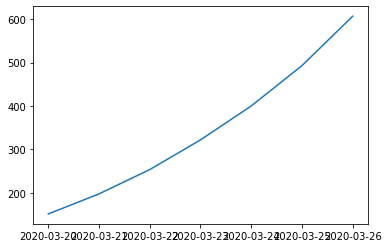

In [63]:
plt.plot(ts)

In [65]:
data3= data2.T

In [77]:
data3[1]

2020-03-20    151.000000
2020-03-21    197.200000
2020-03-22    253.240000
2020-03-23    321.688000
2020-03-24    399.925600
2020-03-25    492.910720
2020-03-26    606.892864
Name: 1, dtype: float64

In [107]:
data3[1][5]

492.91071999999997

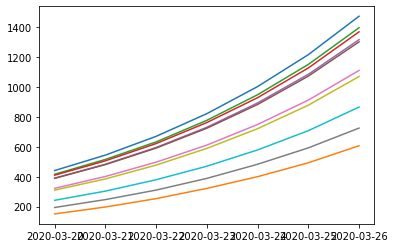

In [69]:
for i in range(10):
    plt.plot(data3[i])

In [75]:
 rolmean = pd.rolling_mean(data3[1], window=2)

AttributeError: module 'pandas' has no attribute 'rolling_mean'

In [73]:
import statsmodels as st

In [76]:
data3[1].rolling(window=2).mean()

2020-03-20           NaN
2020-03-21    174.100000
2020-03-22    225.220000
2020-03-23    287.464000
2020-03-24    360.806800
2020-03-25    446.418160
2020-03-26    549.901792
Name: 1, dtype: float64

In [106]:
data3[1].ewm(com=0.2).mean()

2020-03-20    151.000000
2020-03-21    190.600000
2020-03-22    243.042791
2020-03-23    308.631073
2020-03-24    384.719631
2020-03-25    474.880804
2020-03-26    584.891247
Name: 1, dtype: float64

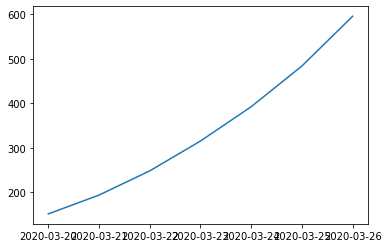

In [83]:
plt.plot(data3[1].ewm(com=0.1).mean())

In [92]:
model = Holt(np.asarray(data3[1]))

In [85]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [102]:
fit1 = model.fit(smoothing_level=.001, smoothing_slope=.001)

In [103]:
pred1 = fit1.forecast(6)
pred1

array([ 646.94883403,  722.15543271,  797.3620314 ,  872.56863009,
        947.77522878, 1022.98182746])

In [89]:
model._index = pd.to_datetime(data3[1].index)

In [104]:
shift= data3[1].ewm(com=0.1).mean()

In [109]:
shift.shift(1)

2020-03-20           NaN
2020-03-21    151.000000
2020-03-22    193.350000
2020-03-23    247.836391
2020-03-24    314.978803
2020-03-25    392.203643
2020-03-26    483.755583
Name: 1, dtype: float64

In [117]:
X=[]
for i in range(10714):
    x= data3[i][6]+(1.2*(data3[i][6]-data3[i][5]))
    X.append(x)

In [120]:
X

[1780.9534847999994,
 743.6714367999998,
 1690.3527808,
 1658.2135680000001,
 1593.6675199999995,
 1576.1290111999997,
 1348.6582655999998,
 883.6321151999996,
 1299.895488,
 1054.4766336,
 1534.7208064,
 886.1650815999999,
 1639.2276863999996,
 618.8888959999999,
 1568.7294335999995,
 1052.6097791999996,
 904.7388031999998,
 848.5732736000001,
 854.6064767999999,
 991.2401279999999,
 1071.9248767999998,
 984.7315839999999,
 1684.8851839999993,
 917.5137663999999,
 721.1023743999997,
 1565.8382207999991,
 1079.8900607999997,
 859.1180159999999,
 1505.5187839999999,
 1642.5422719999995,
 1057.828544,
 1045.7094528,
 1321.9455359999995,
 1094.5835903999996,
 1230.9524351999996,
 1202.0821887999994,
 912.1737599999998,
 1497.786816,
 860.8432511999997,
 826.2406016,
 1499.8438271999996,
 874.8764031999997,
 1437.2335487999997,
 1713.9720575999997,
 1111.6027263999995,
 626.2574975999997,
 1216.7435135999995,
 1778.3423359999997,
 622.8619135999998,
 1505.1605375999995,
 1004.4706687999999

In [121]:
diru= pd.DataFrame({
        "diuresis": X})

In [122]:
diru.to_csv('D:/Downloads/diruesis.csv',index=False)

In [124]:
ratio=[]
for i in range(10714):
    r= data3[i][1]/data3[i][0]
    ratio.append(r)

In [125]:
np.mean(ratio)

1.26025452545262

In [126]:
def diuresis_27th(diuresis_20th):
    d1= 1.26025*diuresis_20th
    d2= d1+(1.2*(d1-diuresis_20th))
    d3= d2+(1.2*(d2-d1))
    d4= d3+(1.2*(d3-d2))
    d5= d4+(1.2*(d4-d3))
    d6= d5+(1.2*(d5-d4))
    d7= d6+(1.2*(d6-d5))
    return d7

In [128]:
diuresis_27th(150)

654.2046024000001

In [129]:
test_di= pd.read_excel('D:\Downloads\Test_dataset.xlsx')

In [136]:
diuresis_27=[]
for i in range(14498):
    D= diuresis_27th(test_di['Diuresis'][i])
    diuresis_27.append(D)

In [137]:
diuresis_27[:3]

[1692.2092382079993, 1783.7978825440007, 1919.0001670399993]

In [138]:
diru_27= pd.DataFrame({
        "Diuresis": diuresis_27})

In [139]:
diru_27.to_csv('D:/Downloads/Diruesis27.csv',index=False)